<h1><center>Review of my participation in table tennis games in 2022</center></h1>

![tt Logo](https://tennisconnected.com/home/wp-content/uploads/2021/10/table-tennis.jpg)

## Introduction

* Table tennis (also called Ping Pong) is a sport close to my heart. As an organizer of table tennis games in Calgary, I was tracking player participation throughout the year. Player names were added into separate signup sheets by players themselves and I just copy-pasted the entire signup sheet to my excel file. Therefore, there are major inconsistencies in the way names were added by players for each event date. 
* I did not gather this data thinking I will do data analysis on it. However, recently I was curious to get some insights out of the messy data I had been gathering.
* The data is for 53 different events (thus 53 rows) and pertains to 61 unique players. This analysis could easily be carried out in Excel or any spreadsheet program. However, I enjoy using Python and I thought this is a good opportunity to refresh my data cleaning skills while trying to get a good visual out of this process.

Here it goes...

## Data Cleaning

In [1]:
# Importing necessary Python libraries
import pandas as pd
import numpy as np
from sjvisualizer import DataHandler, Canvas, BarRace, StaticImage
import re
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
import warnings
from IPython import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.simplefilter('ignore')

In [2]:
# Reading in the excel file
tt = pd.read_excel("/Users/ibtassam/Documents/Techfolder/Github TT project/tabletennis/tt_signupsheets.xlsx")
tt.head() # The player data is separated by linebreaks "\n" within the same cell for each date.

,Date,Players
0,2022-12-30 00:00:00,1. Ibtassam Rasheed - Credit\n2. Irfan Ahmed -...
1,2022-12-27 00:00:00,1. Ibtassam Rasheed - Credit 🏓 🍽️ \n2. Irfan A...
2,2022-12-23 00:00:00,1. Ibtassam Rasheed - Credit\n2. Irfan Ahmed -...
3,2022-12-16 00:00:00,1. Ibtassam Rasheed - Credit\n2. Irfan Ahmed -...
4,2022-12-09 00:00:00,1. Irfan Ahmed - Credit\n2. Syed Hamid - Cred...


As it is apparent from the above dataframe, the players were mentioned for each separate event within one 'cell'. They are separated by linebreaks. Some cells contain as many as 16 players for a single event date. Let's attempt to separate the data.

It is also important to note that the names were sometimes added as either first/last name or first + last name etc.

In [3]:
# Change dates to consistent format
tt['Date'] = pd.to_datetime(tt['Date'])
# Split linebreaks within same cell into multiple columns
tt2 = tt.Players.str.split(pat="\n", expand=True)
# This part required the most trial and error to get the best possible regex pattern.
# This was due to names being in various formats, having only first name/first+last/first+middle+last name
# Most names started with numbers but one row did not. Some names had period or hyphen.
for i in range(0,16):
    tt2[i] = tt2[i].str.extract("([A-Za-z]+.\s*\w*)", expand=True)
# I tried many different regex patterns to conclude that this one captures the max criteria at this stage of cleaning.
tt2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Ibtassam Rasheed,Irfan Ahmed,Syed Hamid,Haseeb,Moneeb,Rizwan,Adeel,Mohsin Arshad,Khurram Tauheed,Muhammad Sultan,Ali Dawood,NaN,NaN,NaN,NaN,NaN,None
1,Ibtassam Rasheed,Irfan Ahmed,Khurram,Rizwan Ahmed,Ghulam Mustafa,Salman Inam,Saqib Zaman,Haseeb,Shakeel Ahmed,Moin Khan,NaN,Adeel,Muhammad Sultan,Moneeb,Mohsin,Shahzad,None
2,Ibtassam Rasheed,Irfan Ahmed,Rizwan Ahmed,Ghulam Mustafa,Salman Inam,Haseeb,Shakeel Ahmed,NaN,NaN,Moneeb,Mohsin Arshad,NaN,NaN,NaN,NaN,NaN,None
3,Ibtassam Rasheed,Irfan Ahmed,Ghulam Mustafa,Syed Hamid,Rizwan Ahmed,Haseeb Shahid,Arsalan Ahmed,NaN,Shakeel Ahmed,Mohsin Arshad,Salman Inam,Moneeb,NaN,NaN,NaN,NaN,None
4,Irfan Ahmed,Syed Hamid,Shakeel Ahmed,Moneeb Shahid,Kashif Channar,Moin Khan,Haseeb Shahid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


A very specific regex pattern allowed me to get the names in such a way that no names were skipped and they were parted into separate columns.

I checked the unique names that were in the dataframe now and found that I will have to use soem targeted cleaning criteria. I was able to reduce the number of unique player names by doing the following.

* Removing lead/ trailing spaces.
* Making only the first alphabet of first & last names capitalized.
* Added last names for people who had only added first name sometimes and full name other times. I considered other options but found manual addition to be the best option as there were a few players who had the same first names.

In [4]:
# Compensating for 3 duplicate values that had same name
tt2[10]= tt2[10].replace({'Kashif Khalil':'Kashif Khalil son'})
tt2[8]= tt2[8].replace({'Kashif Khalil':'Kashif Khalil son'})
# Removing leading and trailing spaces using RegExp
tt2 = tt2.replace(r"^ +| +$", r"", regex=True)
# Capitalize the first letters of first name and last names only
# Used for loop as it was giving Type Error (due to non-str values) when applied on entire df.
for i in range(len(tt2.columns)):
    tt2[i] = tt2[i].str.title()
# Manual replacements for same person's names that were entered in various ways.
tt2 = tt2.replace(to_replace ='Adeel$', value = 'Adeel Fayyaz', regex = True)
tt2 = tt2.replace(to_replace ='Haseeb$', value = 'Haseeb Shahid', regex = True)
tt2 = tt2.replace(to_replace ='Imran$', value = 'Imran Khan', regex = True)
tt2 = tt2.replace(to_replace ='Khurram$', value = 'Khurram Tauheed', regex = True)
tt2 = tt2.replace(to_replace ='M.Salman$', value = 'Salman Inam', regex = True)
tt2 = tt2.replace(to_replace ='Salman Imam$', value = 'Salman Inam', regex = True)
tt2 = tt2.replace(to_replace ='M. Salman$', value = 'Salman Inam', regex = True)
tt2 = tt2.replace(to_replace ='Mohsin$', value = 'Mohsin Arshad', regex = True)
tt2 = tt2.replace(to_replace ='Moin$', value = 'Moin Khan', regex = True)
tt2 = tt2.replace(to_replace ='Moneeb$', value = 'Moneeb Shahid', regex = True)
tt2 = tt2.replace(to_replace ='Nabeel$', value = 'Nabeel Khalid', regex = True)
tt2 = tt2.replace(to_replace ='Nabeel-Paid$', value = 'Nabeel Khalid', regex = True)
tt2 = tt2.replace(to_replace ='^Nadeem$', value = 'Nadeem Noor', regex = True)
tt2 = tt2.replace(to_replace ='^Nadeem N$', value = 'Nadeem Noor', regex = True)
tt2 = tt2.replace(to_replace ='^\w*\,\sNadeem$', value = 'Nadeem Noor', regex = True)
tt2 = tt2.replace(to_replace ='Owais$', value = 'Owais Amin', regex = True)
tt2 = tt2.replace(to_replace ='Owais Ahme$', value = 'Owais Amin', regex = True)
tt2 = tt2.replace(to_replace ='\w*.M$', value = 'Sheikh Ali', regex = True)
tt2 = tt2.replace(to_replace ='^Sheikh Muhammad$', value = 'Sheikh Ali', regex = True)
tt2 = tt2.replace(to_replace ='Shoaib$', value = 'Shoaib Muhammad', regex = True)
tt2 = tt2.replace(to_replace ='Rizwan$', value = 'Rizwan Ahmed', regex = True)
tt2 = tt2.replace(to_replace ='Rizwan$', value = 'Rizwan Ahmed', regex = True)

In [5]:
# Checking for duplicates/ name format inconsistencies that are still remaining.
df2cols = set(np.concatenate(tt2.values))
#display(df2cols)
tt2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Ibtassam Rasheed,Irfan Ahmed,Syed Hamid,Haseeb Shahid,Moneeb Shahid,Rizwan Ahmed,Adeel Fayyaz,Mohsin Arshad,Khurram Tauheed,Muhammad Sultan,Ali Dawood,NaN,NaN,NaN,NaN,NaN,None
1,Ibtassam Rasheed,Irfan Ahmed,Khurram Tauheed,Rizwan Ahmed,Ghulam Mustafa,Salman Inam,Saqib Zaman,Haseeb Shahid,Shakeel Ahmed,Moin Khan,NaN,Adeel Fayyaz,Muhammad Sultan,Moneeb Shahid,Mohsin Arshad,Shahzad,None
2,Ibtassam Rasheed,Irfan Ahmed,Rizwan Ahmed,Ghulam Mustafa,Salman Inam,Haseeb Shahid,Shakeel Ahmed,NaN,NaN,Moneeb Shahid,Mohsin Arshad,NaN,NaN,NaN,NaN,NaN,None
3,Ibtassam Rasheed,Irfan Ahmed,Ghulam Mustafa,Syed Hamid,Rizwan Ahmed,Haseeb Shahid,Arsalan Ahmed,NaN,Shakeel Ahmed,Mohsin Arshad,Salman Inam,Moneeb Shahid,NaN,NaN,NaN,NaN,None
4,Irfan Ahmed,Syed Hamid,Shakeel Ahmed,Moneeb Shahid,Kashif Channar,Moin Khan,Haseeb Shahid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


Now that I have dataframe with correct player names corresponding to each date, I would like to transform this data to a form where I have progressive participation displayed in a cumulative numerical number format. This is requirement of the visual I want to use i.e. Racing bar chart. Although date column is missing here but I will now concatenate it back as there are no operations happening here that will affect the number of rows or their sequence.

In [6]:
tt2.stack().value_counts()
# this code also allows me to see the final particpation numbers of players. However I am keeping it for reference only.
# I used this to verify my final numbers.

Haseeb Shahid        51
Irfan Ahmed          50
Ibtassam Rasheed     43
Syed Hamid           38
Ghulam Mustafa       31
Shakeel Ahmed        27
Moneeb Shahid        25
Moin Khan            24
Salman Inam          19
Nadeem Noor          19
Nabeel Khalid        17
Ghufran Khan         12
Muhammad Sultan      10
Kashif Khalil        10
Adeel Fayyaz          9
Sheikh Ali            8
Kashif Channar        7
Khurram Tauheed       6
Imran Khan            4
Shahzad Majid         4
Mohsin Arshad         4
Rizwan Ahmed          4
Bassam Khalil         3
Kashif Khalil Son     3
Owais Amin            3
Arsalan Ahmed         3
Usman Khan            2
Adnan Zeeshan         2
Masood Akhtar         2
Kamran Imam           2
Fahad Farooq          2
Shoaib Muhammad       2
Faaz Khan             2
Sumair Awan           1
Hammad T              1
Shehryar Aftab        1
Babar Siddiqui        1
Fahad Tariq           1
Zeeshan Ali           1
Mohammad Taha         1
Usman Nadeem          1
Umer Iqbal      

In [7]:
tt3 = pd.concat([tt,tt2], axis=1)
tt3 = tt3.drop('Players', axis=1)
tt3.head(2)

,Date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2022-12-30,Ibtassam Rasheed,Irfan Ahmed,Syed Hamid,Haseeb Shahid,Moneeb Shahid,Rizwan Ahmed,Adeel Fayyaz,Mohsin Arshad,Khurram Tauheed,Muhammad Sultan,Ali Dawood,NaN,NaN,NaN,NaN,NaN,None
1,2022-12-27,Ibtassam Rasheed,Irfan Ahmed,Khurram Tauheed,Rizwan Ahmed,Ghulam Mustafa,Salman Inam,Saqib Zaman,Haseeb Shahid,Shakeel Ahmed,Moin Khan,NaN,Adeel Fayyaz,Muhammad Sultan,Moneeb Shahid,Mohsin Arshad,Shahzad,None


In [8]:
# Creating new df that will allow me to add 1 for each date if a certain player played on that date.
df = pd.DataFrame(columns=set(np.concatenate(tt2.values)))
df2 = pd.concat([tt,df], axis=1)
df2 = df2.drop('Players', axis=1)
#df2 = df2[df2.columns.dropna()]
df2 = df2.fillna(0)
df2.head(2)

,Date,NaN,Shazil,Moneeb Shahid,Asim Akhtar,Syed Hamid,Shahzad Majid,Shehryar Aftab,Bassam Khalil,Khurram Tauheed,Ibtassam Rasheed,Ghulam Mustafa,Moin Khan,Adnan Ahmed,Nouman Javed,Shahzad,Kashif Khalil,Ali Dawood,Zeeshan Ali,Shahid,Rizwan Ahmed,Ghufran Khan,Sumair Awan,Kamran Imam,Hammad T,Irfan Ahmed,Salman Inam,Kashif Khalil Son,Umer Iqbal,Arsalan Ahmed,Babar Siddiqui,None,Masood Akhtar,Haseeb Shahid,Moiz Dawar,Fahad Farooq,Usman Nadeem,Sheikh Ali,Nadeem Noor,Ehsan,Shahid Rafiq,Syed Adnan,Taha R,Nabeel Khalid,Shoaib Muhammad,Adnan,Mohsin Arshad,Owais Amin,Adeel Fayyaz,Saqib Zaman,Sachal Afraz,Usman Khan,Naveed Iqbal,Kashif Mughal,Adnan Zeeshan,Muhammad Sultan,Imran Khan,Fahad Tariq,Mohammad Taha,Kashif Channar,Faaz Khan,Shakeel Ahmed
0,2022-12-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2022-12-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


My empty dataframe with 0 values is ready. Now I just need to add 1 for each date only if a certain player showed up on that date.

In [9]:
# Using the newly created empty dataframe to add actual values from categorical table
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for index,row in tt3.iterrows():
    for col in cols:
        df2[row[col]][index] += 1

Now I will cumulatively sum each row to get a running number of games each player participated in. But first, I will sort the  data in ascending order.

In [10]:
# Sort by ascending order of 'Date'
df2.sort_values(by='Date', ascending = True, inplace = True) 
# Only 'cumsum' on the columns that have number of games (i.e. exclude 'Date' column)
df2.loc[:, list(df2cols)] = df2.loc[:, list(df2cols)].cumsum() 
# Dropping 'NaN' column
df2 = df2.drop(np.nan, axis=1)
df2.tail()

,Date,Shazil,Moneeb Shahid,Asim Akhtar,Syed Hamid,Shahzad Majid,Shehryar Aftab,Bassam Khalil,Khurram Tauheed,Ibtassam Rasheed,Ghulam Mustafa,Moin Khan,Adnan Ahmed,Nouman Javed,Shahzad,Kashif Khalil,Ali Dawood,Zeeshan Ali,Shahid,Rizwan Ahmed,Ghufran Khan,Sumair Awan,Kamran Imam,Hammad T,Irfan Ahmed,Salman Inam,Kashif Khalil Son,Umer Iqbal,Arsalan Ahmed,Babar Siddiqui,None,Masood Akhtar,Haseeb Shahid,Moiz Dawar,Fahad Farooq,Usman Nadeem,Sheikh Ali,Nadeem Noor,Ehsan,Shahid Rafiq,Syed Adnan,Taha R,Nabeel Khalid,Shoaib Muhammad,Adnan,Mohsin Arshad,Owais Amin,Adeel Fayyaz,Saqib Zaman,Sachal Afraz,Usman Khan,Naveed Iqbal,Kashif Mughal,Adnan Zeeshan,Muhammad Sultan,Imran Khan,Fahad Tariq,Mohammad Taha,Kashif Channar,Faaz Khan,Shakeel Ahmed
4,2022-12-09,1,21,1,36,4,1,3,4,39,28,23,1,1,0,10,0,1,1,0,12,1,2,1,46,16,3,1,2,1,0,2,47,1,2,1,7,19,1,1,1,1,17,2,1,0,3,7,0,1,2,1,1,2,8,4,1,1,7,2,24
3,2022-12-16,1,22,1,37,4,1,3,4,40,29,23,1,1,0,10,0,1,1,1,12,1,2,1,47,17,3,1,3,1,0,2,48,1,2,1,7,19,1,1,1,1,17,2,1,1,3,7,0,1,2,1,1,2,8,4,1,1,7,2,25
2,2022-12-23,1,23,1,37,4,1,3,4,41,30,23,1,1,0,10,0,1,1,2,12,1,2,1,48,18,3,1,3,1,0,2,49,1,2,1,7,19,1,1,1,1,17,2,1,2,3,7,0,1,2,1,1,2,8,4,1,1,7,2,26
1,2022-12-27,1,24,1,37,4,1,3,5,42,31,24,1,1,1,10,0,1,1,3,12,1,2,1,49,19,3,1,3,1,0,2,50,1,2,1,7,19,1,1,1,1,17,2,1,3,3,8,1,1,2,1,1,2,9,4,1,1,7,2,27
0,2022-12-30,1,25,1,38,4,1,3,6,43,31,24,1,1,1,10,1,1,1,4,12,1,2,1,50,19,3,1,3,1,0,2,51,1,2,1,7,19,1,1,1,1,17,2,1,4,3,9,1,1,2,1,1,2,10,4,1,1,7,2,27


In [11]:
df2.to_excel('/Users/ibtassam/Downloads/tt3.xlsx', index=False)

This visual package is designed to be used with excel files. Above, I created an excel file which I will use in the below cell to run my visual.

To run this visual, you will first need to install the SJvisualizer package. More info can be found [here](https://github.com/SjoerdTilmans/sjvisualizer/tree/main/sjvisualizer).

Thereafter, the below cell would need to be changed to 'Code' from 'Raw NBConvert'. 

In [ ]:
from sjvisualizer import DataHandler, Canvas, BarRace, StaticImage
EXCEL_FILE = "/Users/ibtassam/Downloads/tt3.xlsx"
FPS = 60
DURATION = 1

#load data into dataframe
df = DataHandler.DataHandler(excel_file = EXCEL_FILE, number_of_frames = FPS*DURATION*60).df

#create canvas
canvas = Canvas.canvas()

#add racing bar chart
bar_chart = BarRace.bar_race(df=df, canvas=canvas.canvas)
canvas.add_sub_plot(bar_chart)

# Adding a title

canvas.add_title("No. of games attended by table tennis players in 2022", color = (0,0,0))
canvas.add_sub_title("See the number change at end of each of the 53 TT events in 2022", color = (150,150,150))

# Adding time label
canvas.add_time(df=df, time_indicator = "month")

#canvas.add_logo(logo = "/Users/ibtassam/Downloads/visualpics/logo.png")
ex1 = StaticImage.static_image(canvas=canvas.canvas, file="/Users/ibtassam/Downloads/visualpics/logo.png", x_pos=2000, y_pos=25, width=150, height=150)
ex = StaticImage.static_image(canvas=canvas.canvas, file="/Users/ibtassam/Downloads/visualpics/ttlogo.png", x_pos=500, y_pos=25, width=150, height=150)
canvas.add_sub_plot(ex)
canvas.add_sub_plot(ex1)


#play the animation
canvas.play(fps=FPS)

This visual does not render within the HTML so I am including an output screen recording [**HERE**](https://youtu.be/KveoZUT2Vqg).

A screen capture of the animation is shown below.

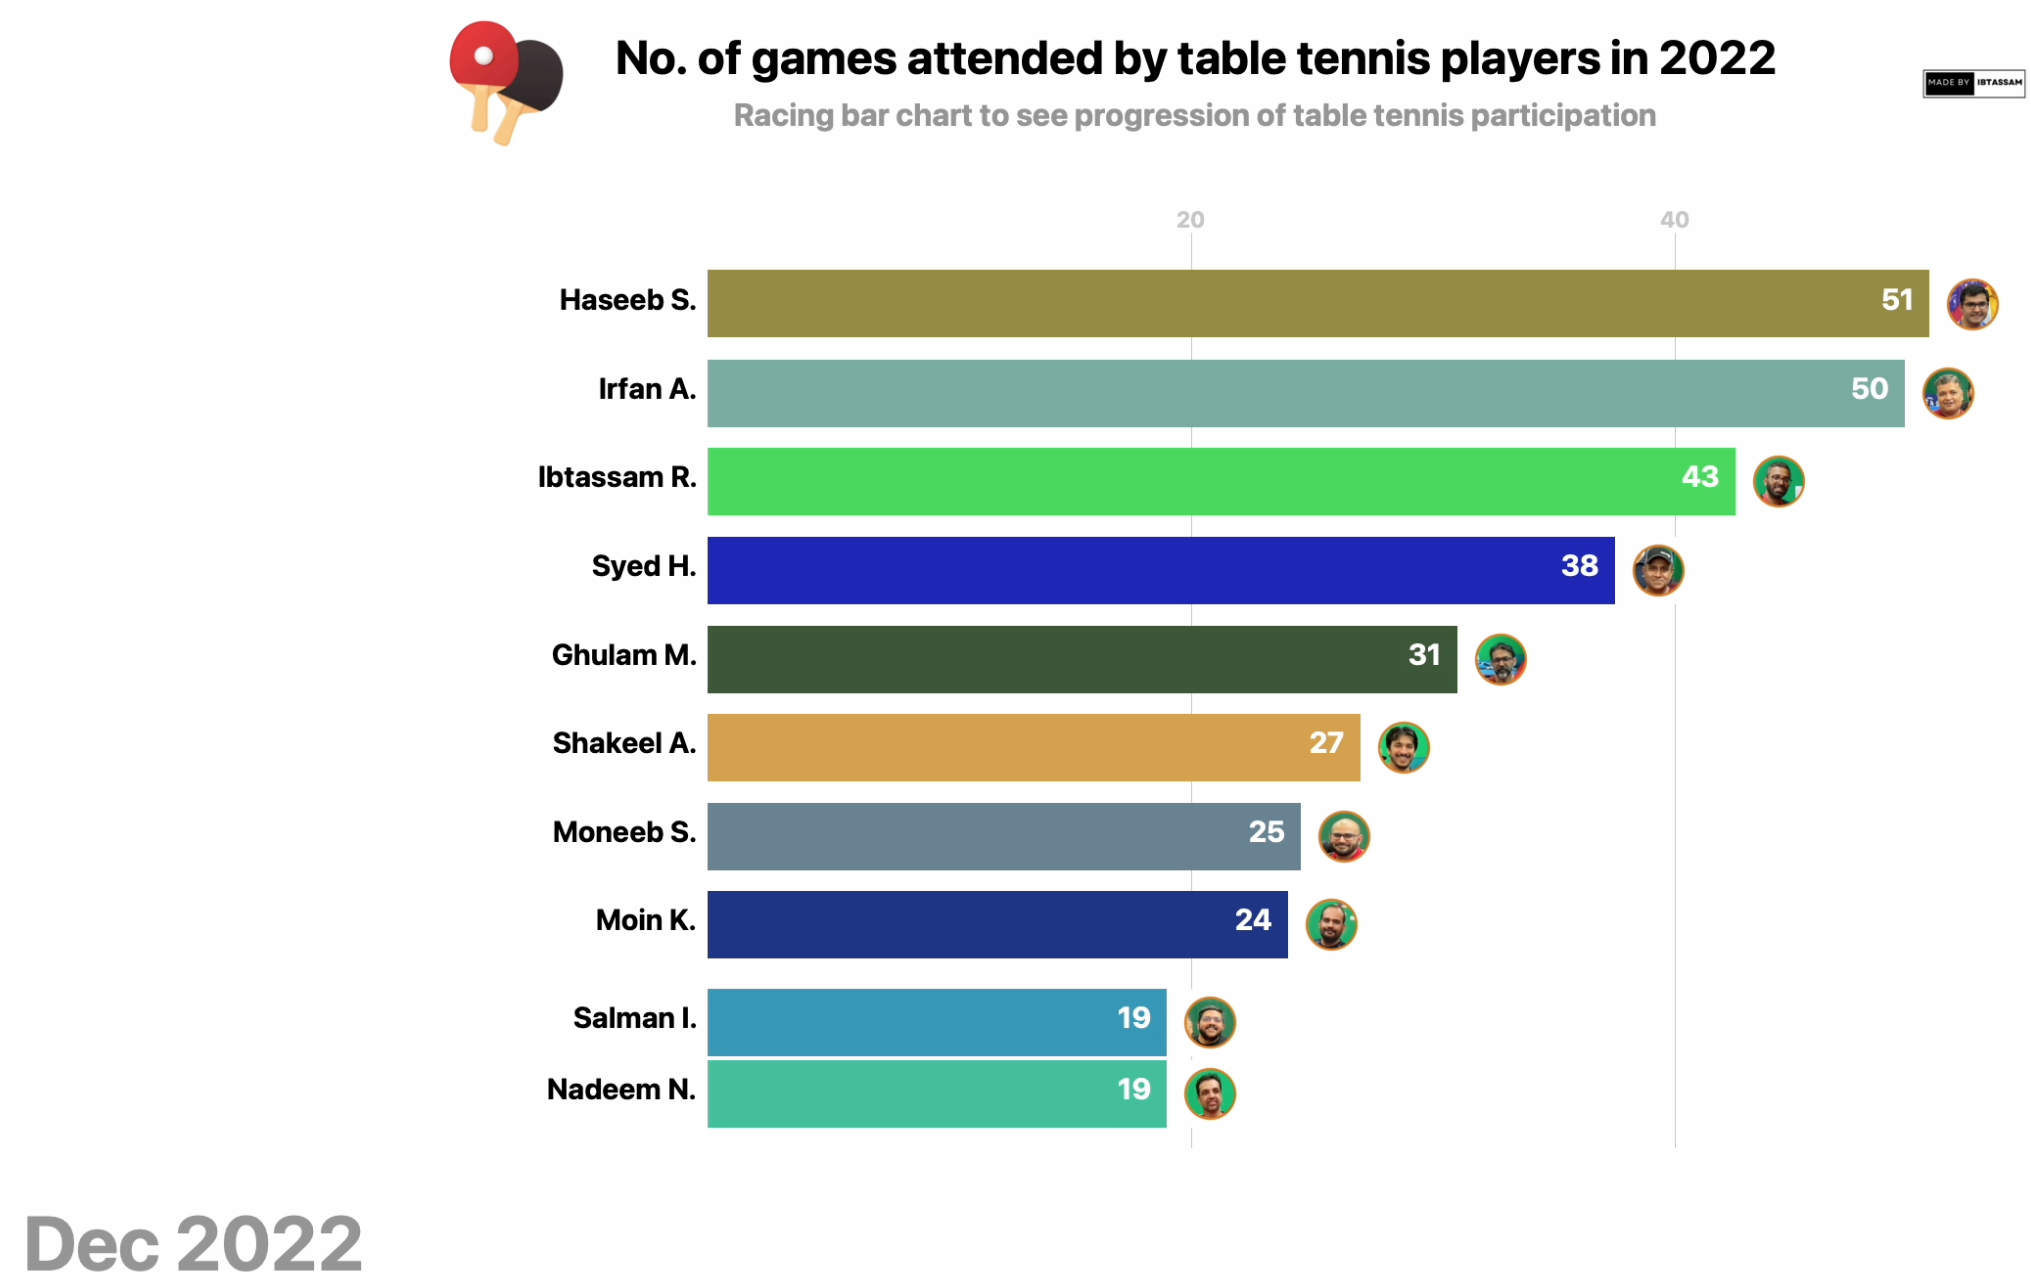

In [12]:
display.Image("/Users/ibtassam/Documents/Techfolder/Github TT project/tabletennis/visualpics/racingbarchartpic.png")

I wanted to also visualize the above data with a wordcloud. Hereafter, you will see the participation numbers of each player in the form a wordcloud.

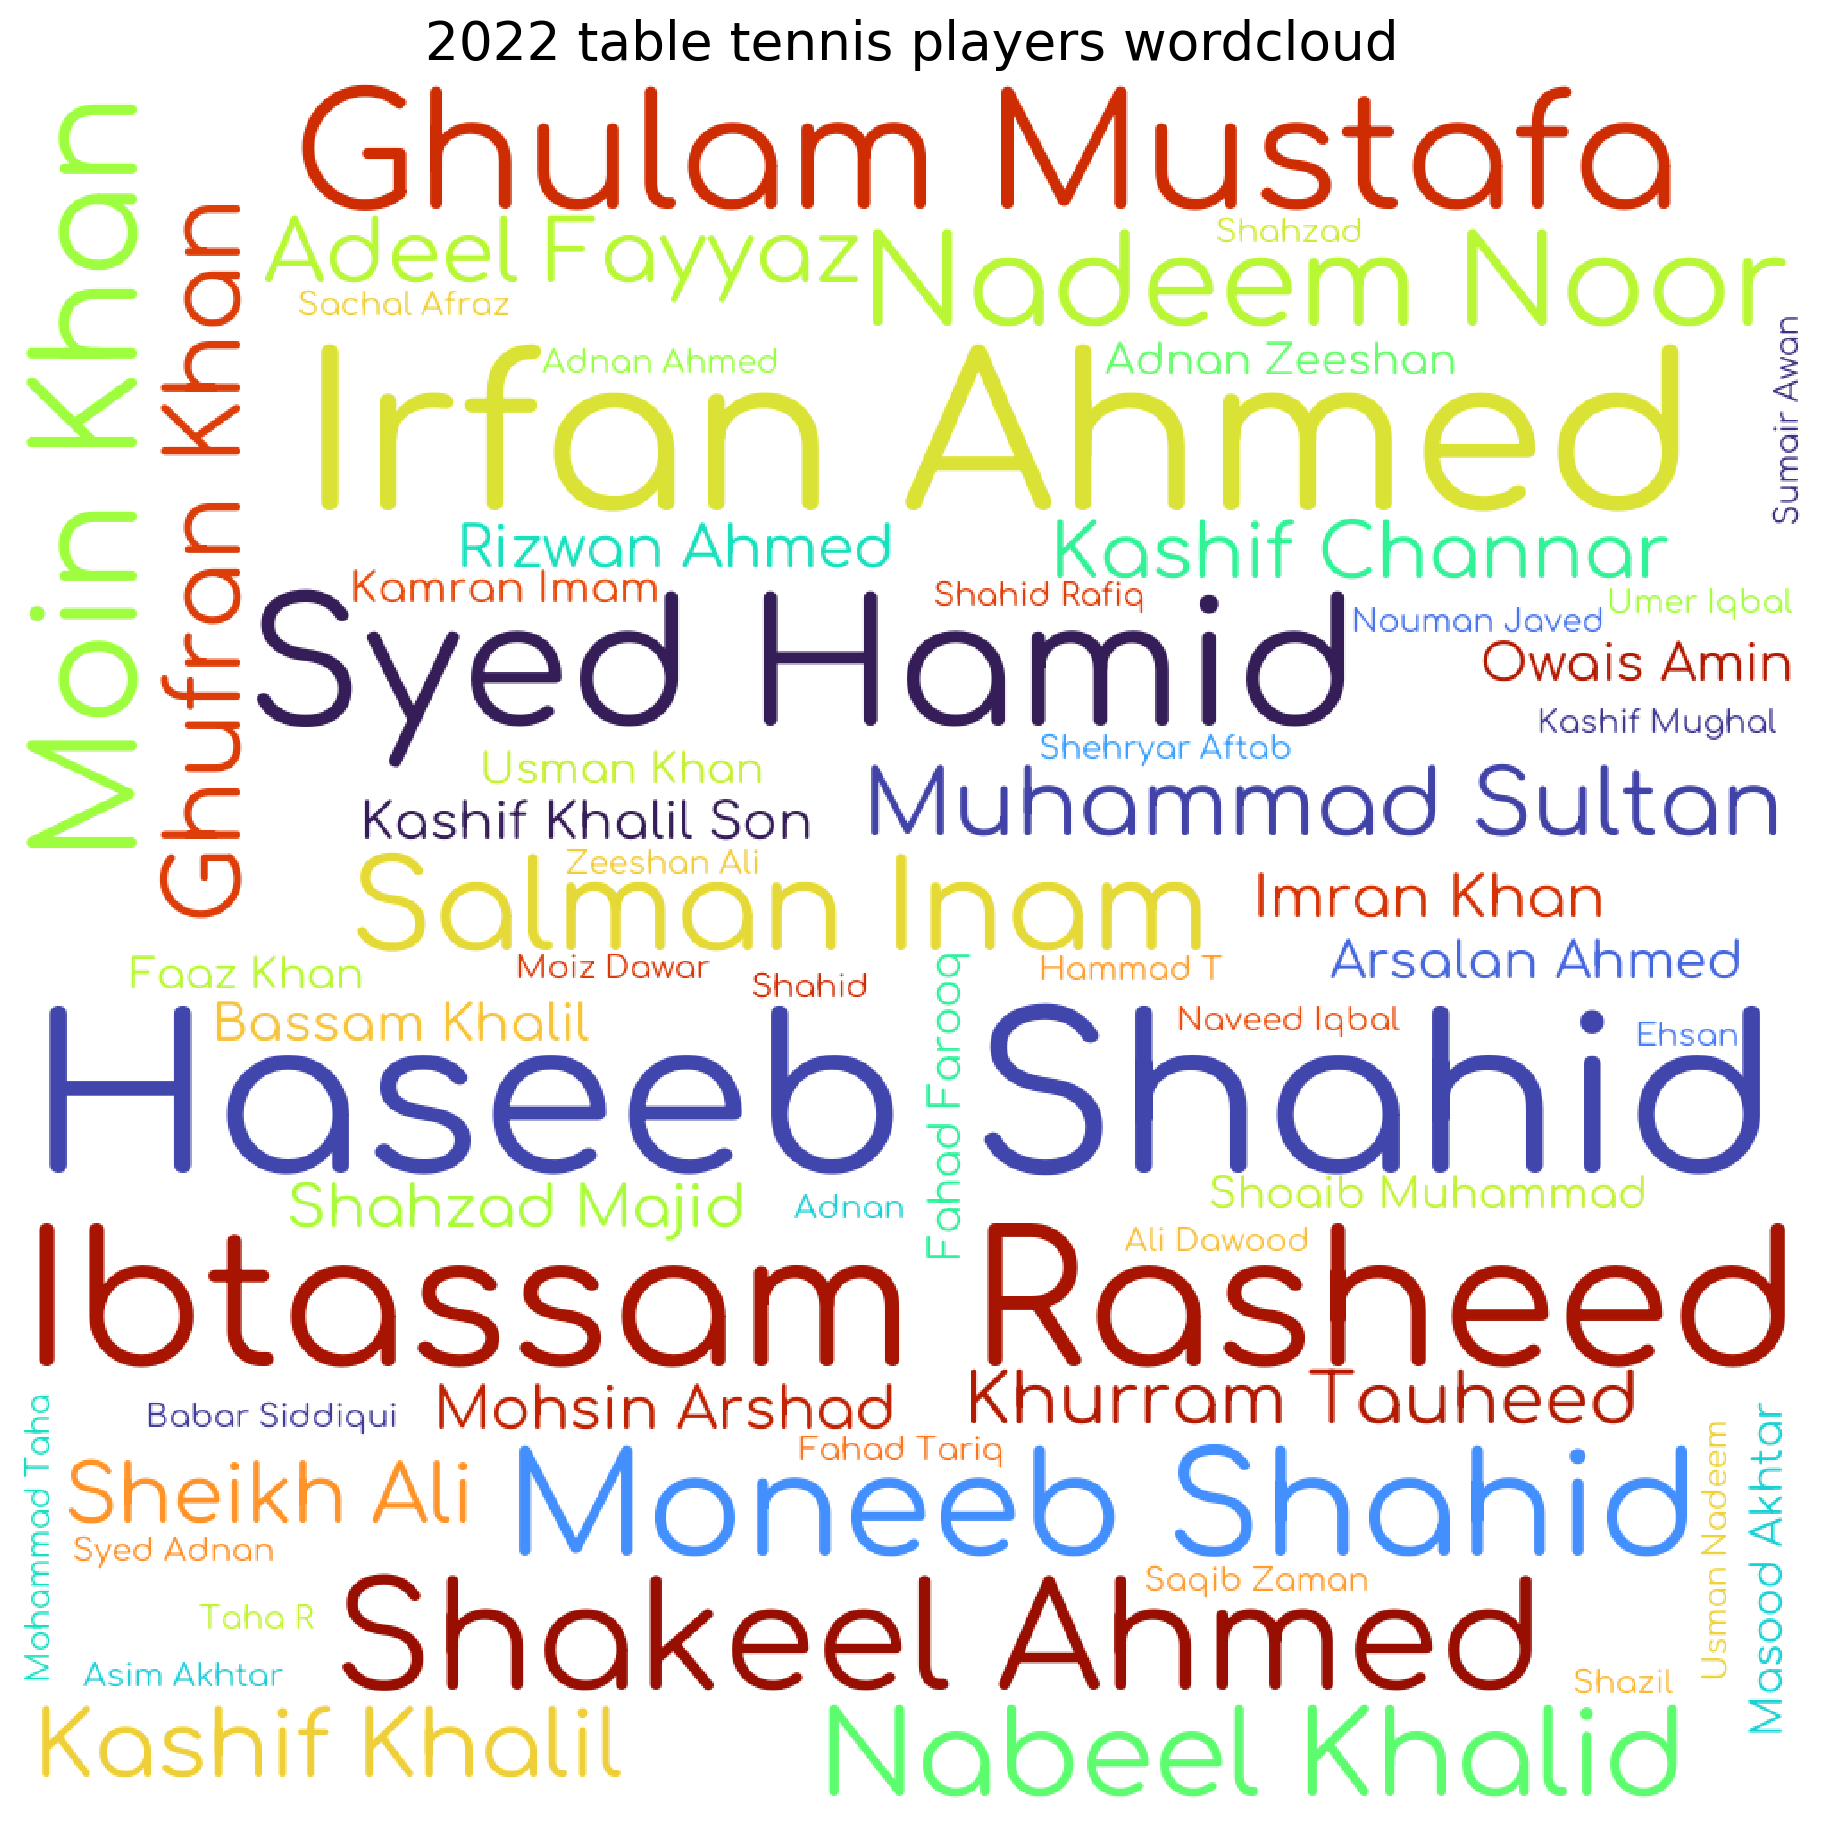

In [13]:
wordcloud = WordCloud(width=1000, height=1000,  min_word_length =3, background_color='white', mode='RGBA'
                     , font_path='/Users/ibtassam/Documents/Techfolder/Github TT project/tabletennis/visualpics/font.ttf', colormap = 'turbo')

# generate the word cloud
wordcloud.generate_from_frequencies(tt2.stack().value_counts())

figure(figsize = (12,12), dpi = 192)

#plot
plt.tight_layout(pad=1)
plt.imshow(wordcloud, interpolation='nearest', aspect = 'auto')
plt.axis('off')
plt.title('2022 table tennis players wordcloud', fontdict = {'fontsize' : 20})
#wordcloud.to_file("wordcloud.png")
plt.show()

Although the above visual gives me the output I desire but I wanted to try the masking feature of wordcloud and display the same information in the shape of a table tennis racket. Though I was successful, I was not able to get the desired resolution. I found that it is a [known issue](https://github.com/amueller/word_cloud/issues/188#issuecomment-289536986) that once you use a mask, you lose the ability to decide its resolution. I will keep an eye out to see when this feature is incorporated.

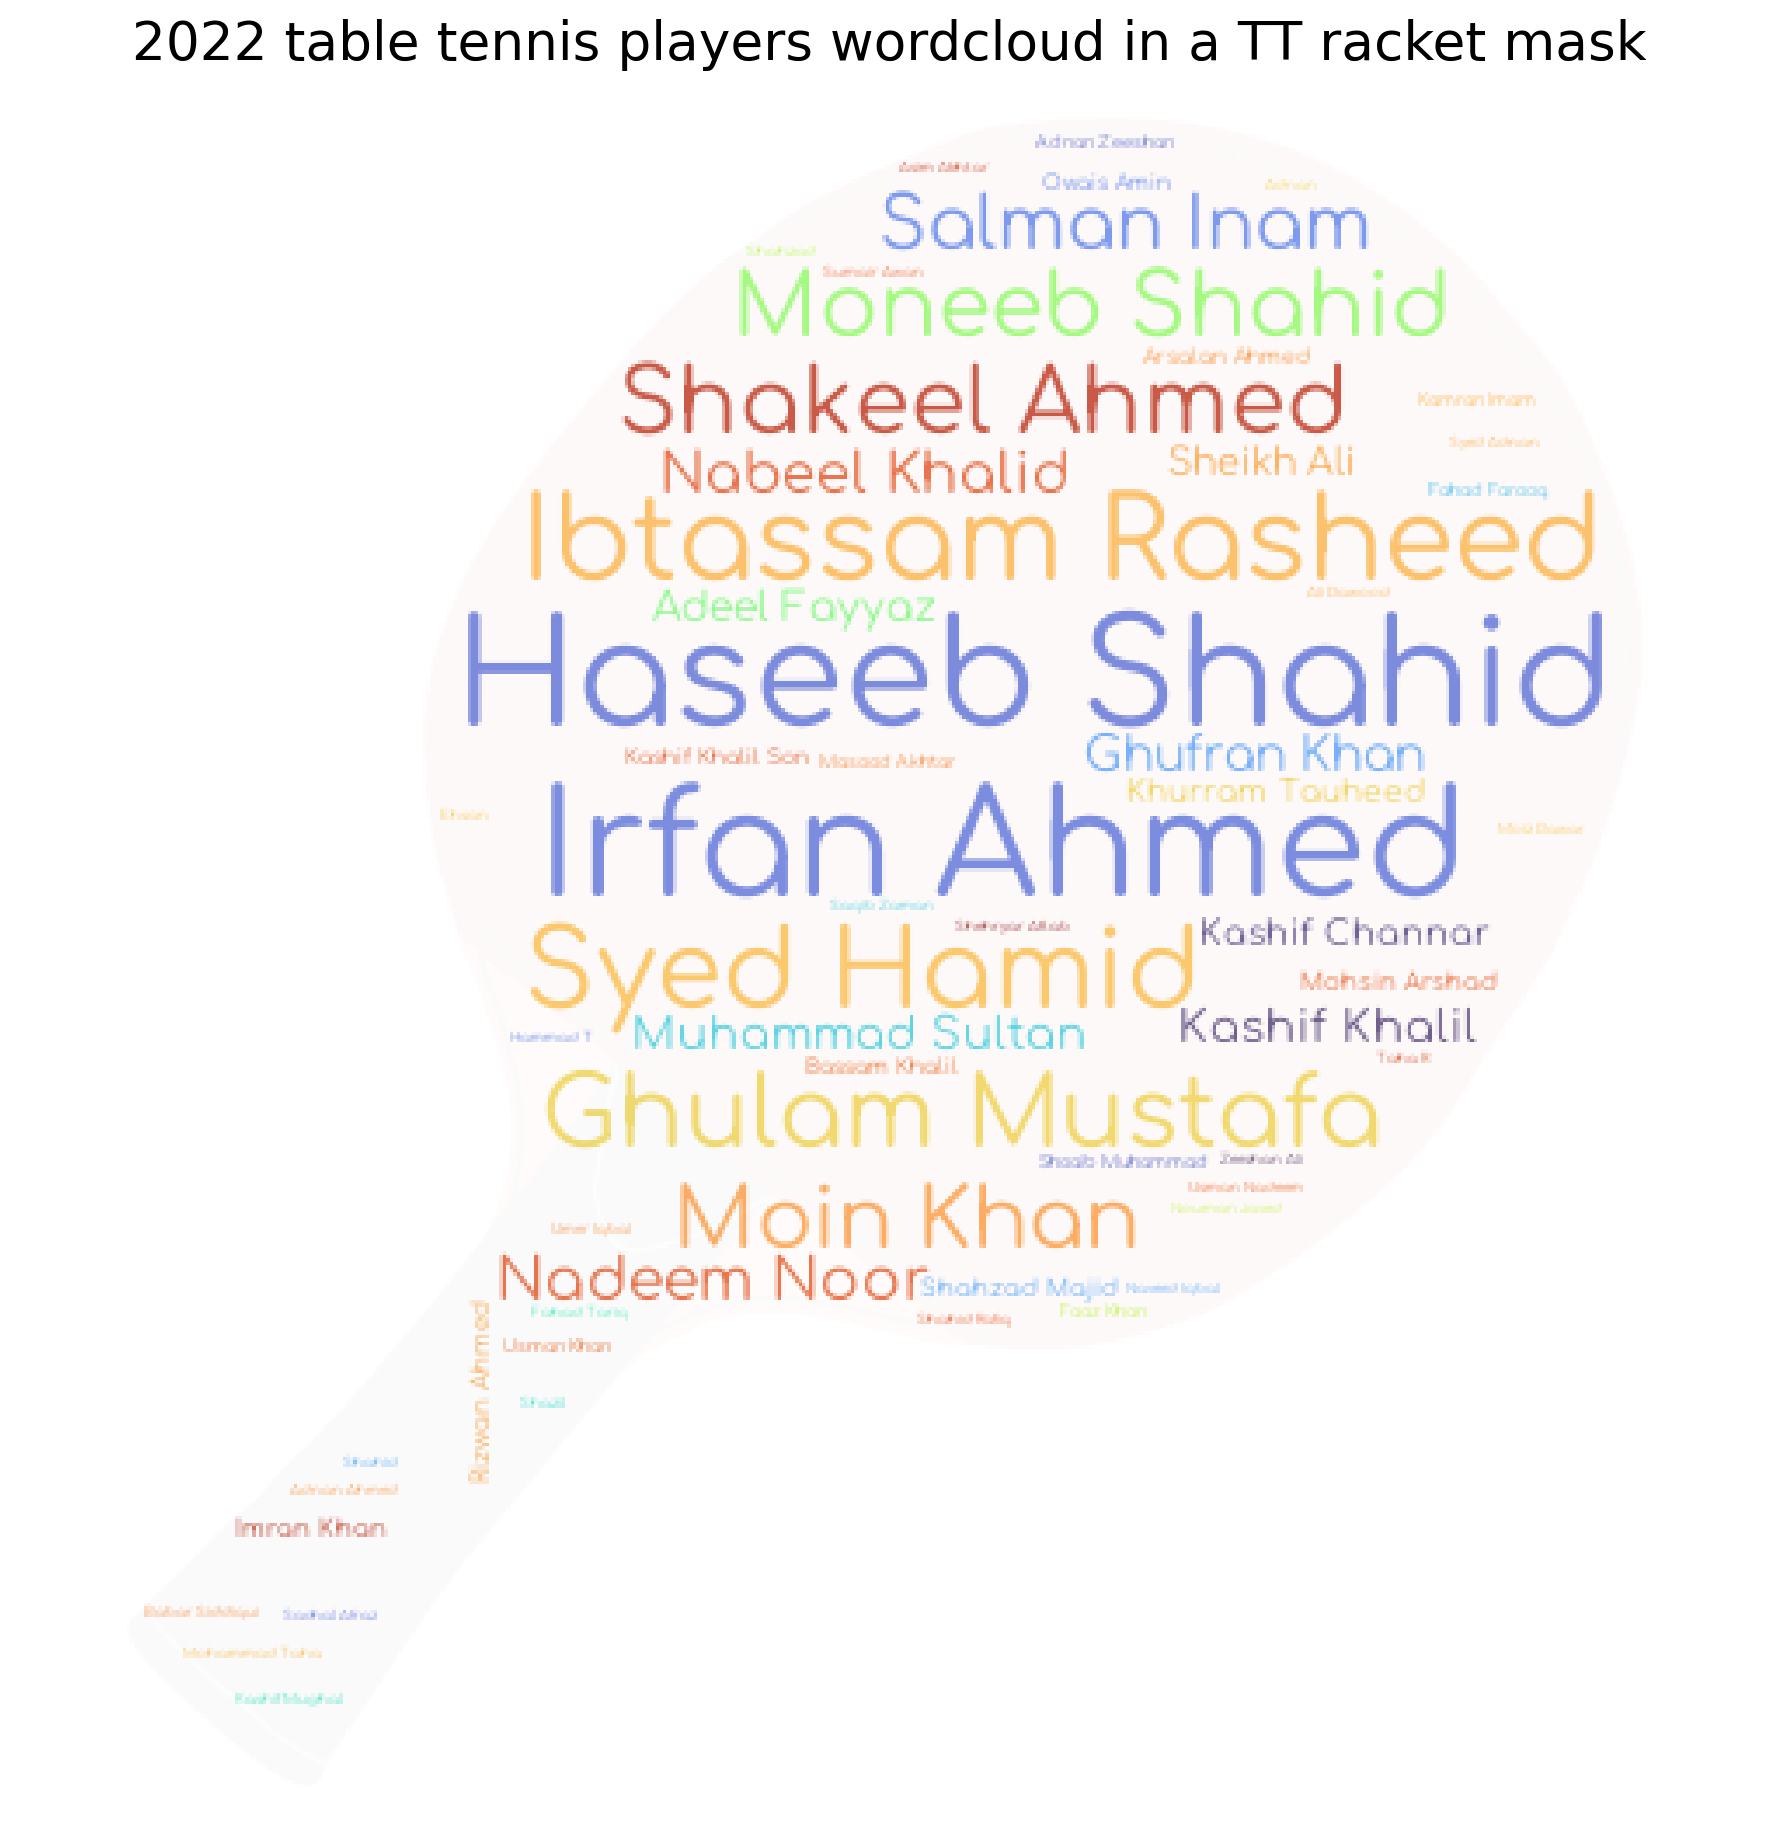

In [14]:
# use the downloaded mask
mask = np.array(Image.open("/Users/ibtassam/Documents/Techfolder/Github TT project/tabletennis/visualpics/Overlay.png"))

wordcloud = WordCloud(width=1000, height=1000,  min_word_length =3, background_color='white', mask=mask, mode='RGBA'
                     , font_path='/Users/ibtassam/Documents/Techfolder/Github TT project/tabletennis/visualpics/font.ttf', colormap = 'turbo')

# generate the word cloud
wordcloud.generate_from_frequencies(tt2.stack().value_counts())
# make the words fit a mask
tt_img = Image.fromarray(wordcloud.to_array())
tt_mask_img = Image.fromarray(mask)
new_img = Image.blend(tt_img, 
                      tt_mask_img, 
                      0.3)

#plt.figure(figsize=(13,13),dpi=196)
figure(figsize = (12,12), dpi = 192)

#plot
plt.tight_layout(pad=1)
plt.imshow(new_img)
plt.axis('off')
plt.title('2022 table tennis players wordcloud in a TT racket mask', fontdict = {'fontsize' : 20})
#wordcloud.to_file("wordcloud.png")
plt.show()

### References

* SJ visualizer package can be installed from this [repository](https://github.com/SjoerdTilmans/sjvisualizer)

* I will also like to thank Jose P. who helped with iterrows function to allow creation of dataframe with player names as column headers.

